# Telco Customer Churn - Exploratory Data Analysis (EDA)

## Overview
This notebook conducts an in-depth Exploratory Data Analysis on the Telco Customer Churn dataset. We'll focus on:
- Understanding data distributions
- Identifying missing values
- Detecting outliers
- Uncovering relationships between variables
- Creating comprehensive visualizations

## Dataset Description
The dataset contains information about telecommunications customers, including demographics, services, and whether they churned (left the company).

## 1. Import Required Libraries
Import all necessary libraries for data analysis and visualization.

In [13]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set style and color palette
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Load the Dataset
Load the Telco Customer Churn dataset and display basic information about the data.

In [14]:
# Load the dataset
df = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

print(f"Dataset shape: {df.shape}")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print("\nFirst 5 rows of the dataset:")
df.head()

Dataset shape: (7043, 21)
Number of rows: 7043
Number of columns: 21

First 5 rows of the dataset:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 3. Inspect Data Structure and Types
Examine the data structure, column names, data types, and identify categorical vs numerical features.

In [15]:
# Data structure and types
print("Dataset Info:")
print(df.info())
print("\n" + "="*50)

print("\nColumn names:")
print(df.columns.tolist())
print("\n" + "="*50)

print("\nData types:")
print(df.dtypes)
print("\n" + "="*50)

# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"\nCategorical columns ({len(categorical_cols)}):")
print(categorical_cols)
print(f"\nNumerical columns ({len(numerical_cols)}):")
print(numerical_cols)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-n

## 4. Summary Statistics
Generate descriptive statistics for numerical and categorical variables.

In [16]:
# Summary statistics for numerical variables
print("Summary Statistics for Numerical Variables:")
print("="*50)
print(df.describe())

print("\n" + "="*80)
print("\nSummary Statistics for Categorical Variables:")
print("="*50)

# For categorical variables, show value counts
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())
    print(f"Unique values: {df[col].nunique()}")
    print("-" * 30)

Summary Statistics for Numerical Variables:
       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


Summary Statistics for Categorical Variables:

customerID:
customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64
Unique values: 7043
------------------------------

gender:
gender
Male      3555
Female    3488
Name: count, dtype: int64
Unique values: 2
------------------------------

Partner:
Partner
No     3641
Yes    3402
Name:

## 5. Identify and Visualize Missing Values
Detect and visualize missing values in the dataset using heatmaps and bar plots.

In [17]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

print("Missing Values Analysis:")
print("="*30)
missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing_Count': missing_values.values,
    'Missing_Percentage': missing_percentage.values
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
print(missing_df)

if len(missing_df) > 0:
    # Create visualizations for missing values
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Bar plot of missing values
    sns.barplot(data=missing_df, x='Missing_Count', y='Column', ax=axes[0])
    axes[0].set_title('Missing Values Count by Column')
    axes[0].set_xlabel('Count of Missing Values')
    
    # Heatmap of missing values
    sns.heatmap(df.isnull(), cbar=True, ax=axes[1], cmap='viridis')
    axes[1].set_title('Missing Values Heatmap')
    axes[1].set_xlabel('Columns')
    axes[1].set_ylabel('Rows')
    
    plt.tight_layout()
    plt.show()
else:
    print("Great! No missing values found in the dataset.")

Missing Values Analysis:
Empty DataFrame
Columns: [Column, Missing_Count, Missing_Percentage]
Index: []
Great! No missing values found in the dataset.


## 6. Data Preprocessing
Handle data type issues and prepare data for analysis.

In [18]:
# Check for data type issues
print("Checking TotalCharges column for non-numeric values:")
print(df['TotalCharges'].dtype)

# Check for non-numeric values in TotalCharges
non_numeric = df[pd.to_numeric(df['TotalCharges'], errors='coerce').isnull()]
print(f"Number of non-numeric values in TotalCharges: {len(non_numeric)}")

if len(non_numeric) > 0:
    print("Non-numeric values:")
    print(non_numeric['TotalCharges'].value_counts())
    
    # Convert TotalCharges to numeric, replacing non-numeric with NaN
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
    
    # Fill NaN values with 0 (these are likely new customers with no charges)
    df['TotalCharges'].fillna(0, inplace=True)
    
    print(f"Converted TotalCharges to numeric and filled NaN with 0")

# Convert SeniorCitizen to categorical for better visualization
df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'No', 1: 'Yes'})

print("\nData preprocessing completed!")
print(f"Final dataset shape: {df.shape}")
print(f"Data types after preprocessing:")
print(df.dtypes)

Checking TotalCharges column for non-numeric values:
object
Number of non-numeric values in TotalCharges: 11
Non-numeric values:
TotalCharges
     11
Name: count, dtype: int64
Converted TotalCharges to numeric and filled NaN with 0

Data preprocessing completed!
Final dataset shape: (7043, 21)
Data types after preprocessing:
customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


## 7. Visualize Data Distributions
Create histograms and box plots for numerical features to understand their distributions.

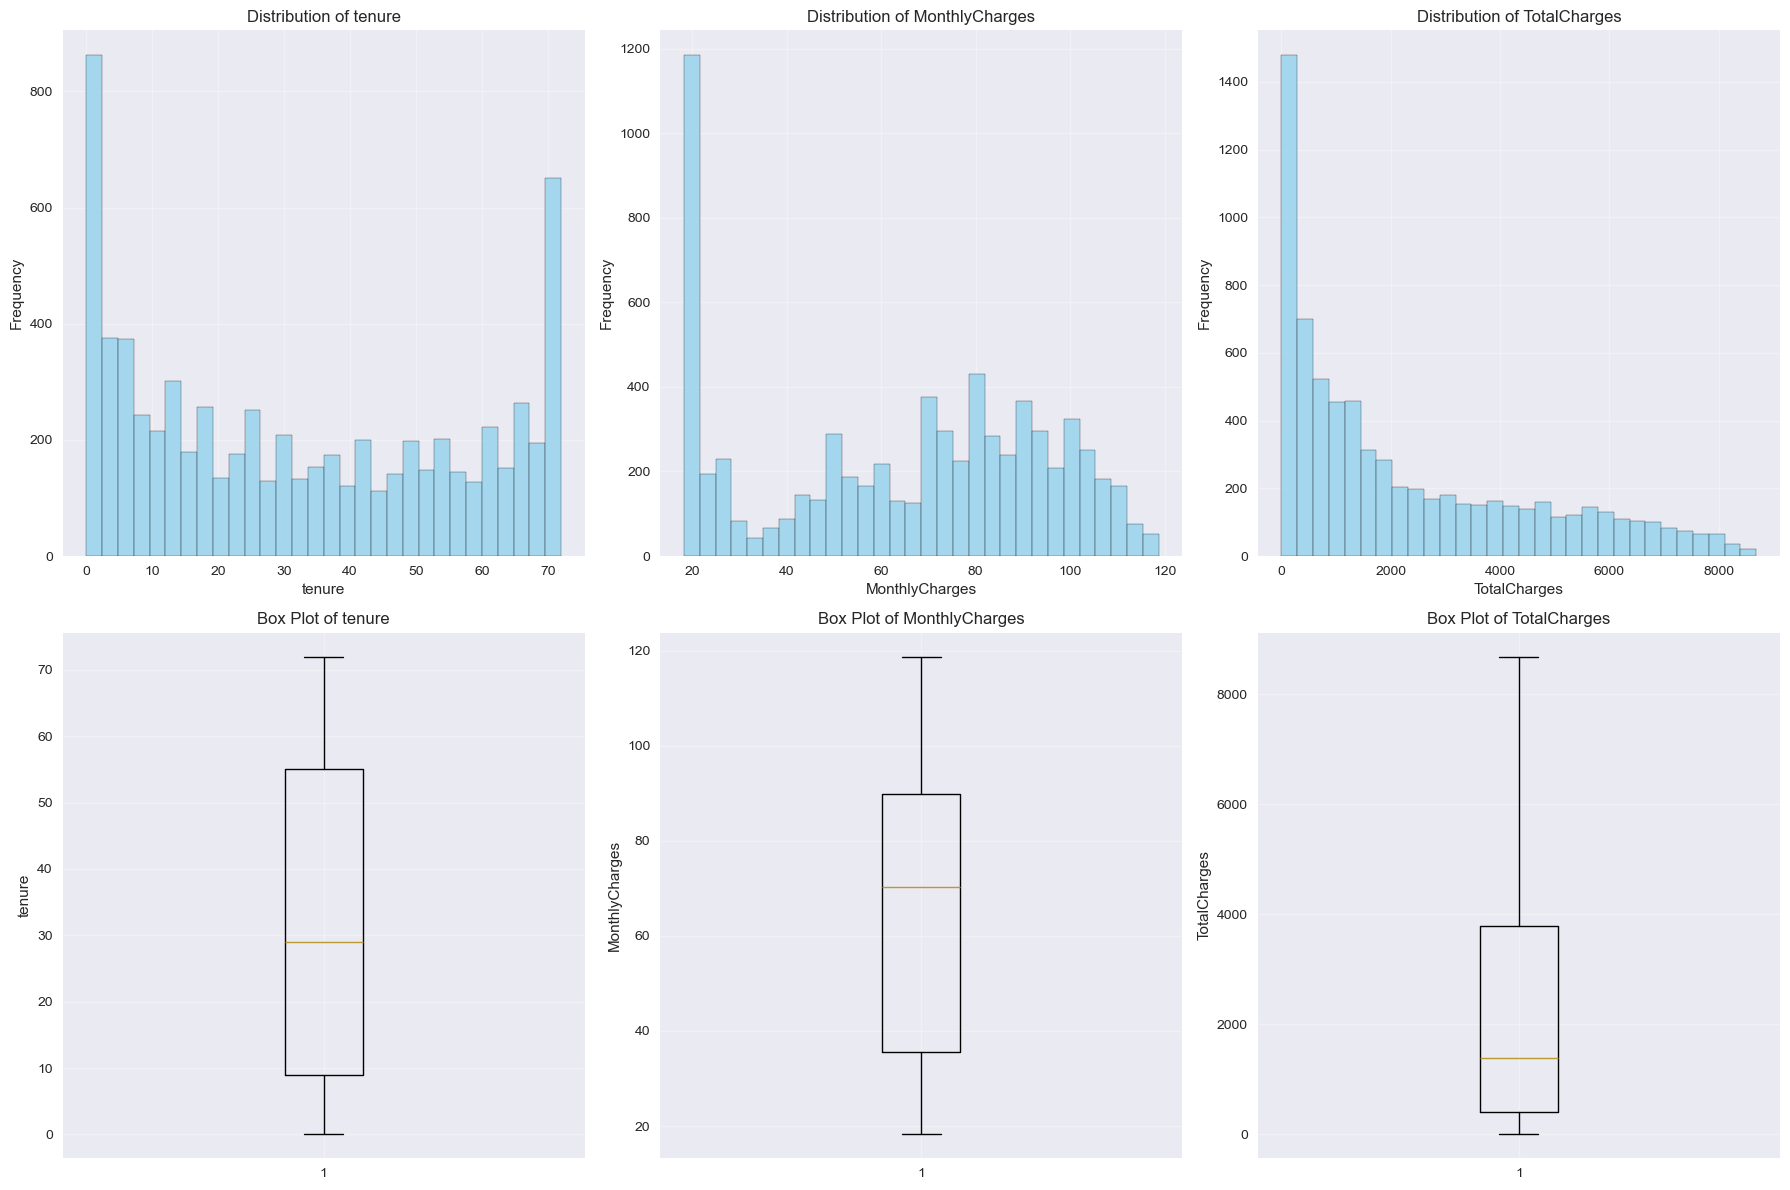

Distribution Analysis:

tenure:
  Mean: 32.37
  Median: 29.00
  Std Dev: 24.56
  Skewness: 0.24
  Kurtosis: -1.39

MonthlyCharges:
  Mean: 64.76
  Median: 70.35
  Std Dev: 30.09
  Skewness: -0.22
  Kurtosis: -1.26

TotalCharges:
  Mean: 2279.73
  Median: 1394.55
  Std Dev: 2266.79
  Skewness: 0.96
  Kurtosis: -0.23


In [19]:
# Update numerical columns after preprocessing
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Create histograms for numerical variables
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, col in enumerate(numerical_cols):
    # Histogram
    axes[i].hist(df[col], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True, alpha=0.3)
    
    # Box plot
    axes[i+3].boxplot(df[col])
    axes[i+3].set_title(f'Box Plot of {col}')
    axes[i+3].set_ylabel(col)
    axes[i+3].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistical summary of distributions
print("Distribution Analysis:")
print("="*50)
for col in numerical_cols:
    print(f"\n{col}:")
    print(f"  Mean: {df[col].mean():.2f}")
    print(f"  Median: {df[col].median():.2f}")
    print(f"  Std Dev: {df[col].std():.2f}")
    print(f"  Skewness: {df[col].skew():.2f}")
    print(f"  Kurtosis: {df[col].kurtosis():.2f}")

## 8. Detect and Visualize Outliers
Identify outliers using IQR method and visualize them with box plots and scatter plots.

Outlier Detection Analysis:

tenure:
  Outliers: 0 (0.00%)
  Lower bound: -60.00
  Upper bound: 124.00

MonthlyCharges:
  Outliers: 0 (0.00%)
  Lower bound: -46.02
  Upper bound: 171.38

TotalCharges:
  Outliers: 0 (0.00%)
  Lower bound: -4683.52
  Upper bound: 8868.67


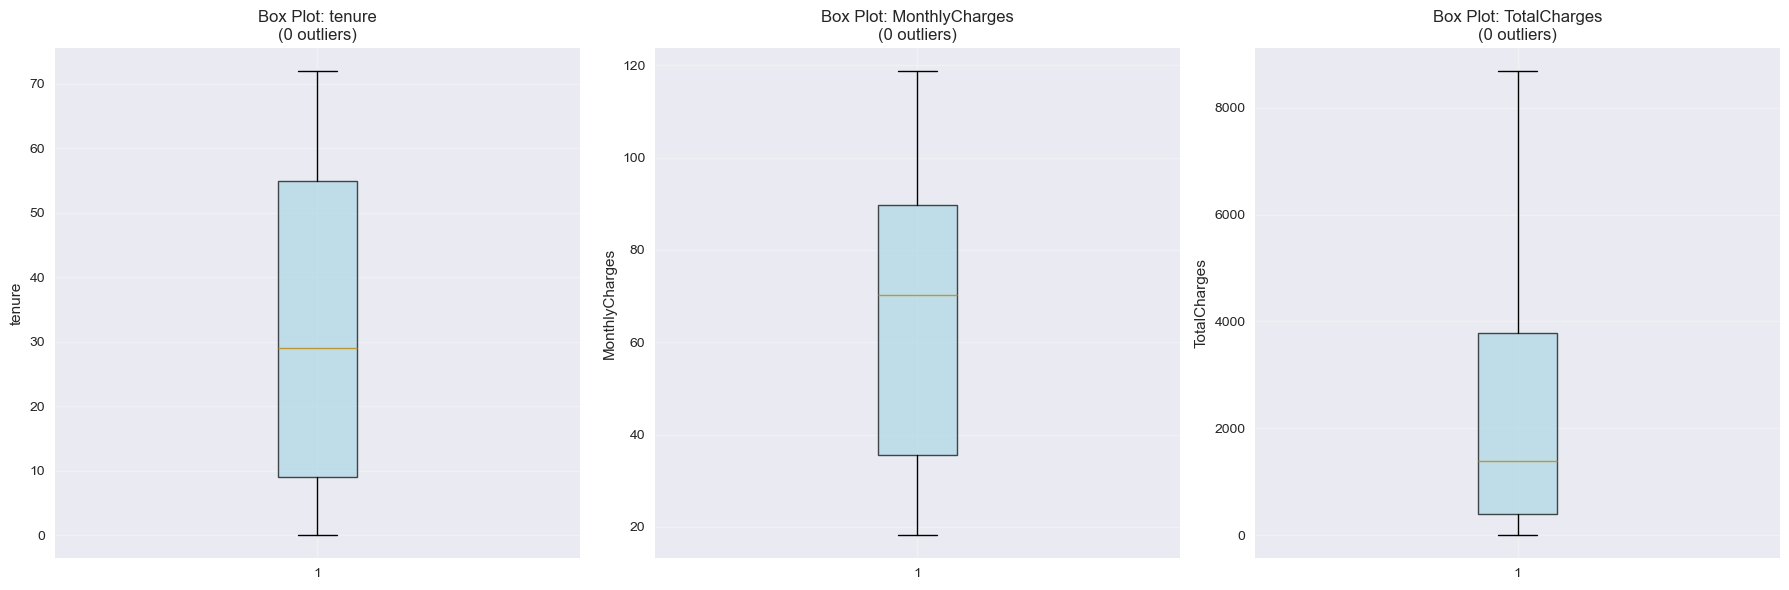

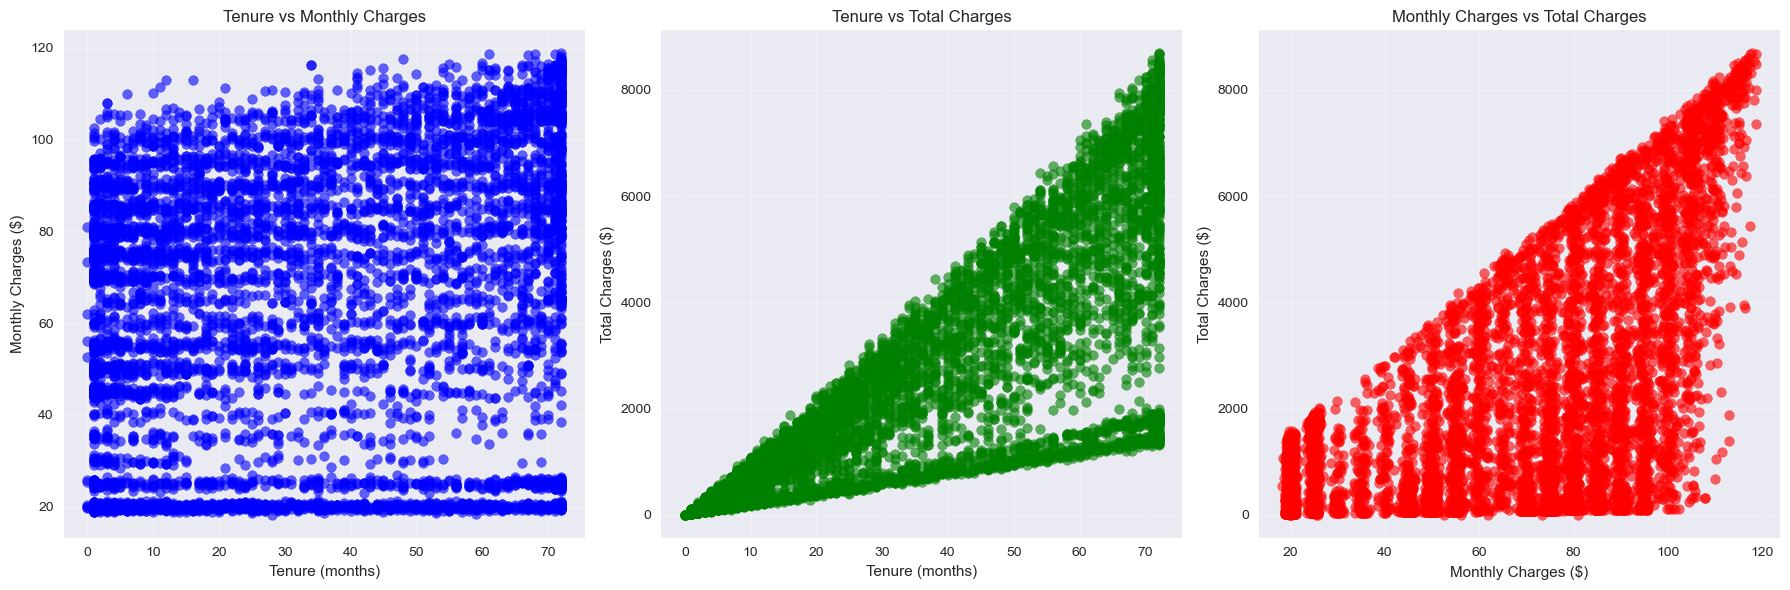

In [20]:
# Function to detect outliers using IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Detect outliers for each numerical column
print("Outlier Detection Analysis:")
print("="*50)

outlier_summary = {}
for col in numerical_cols:
    outliers, lower, upper = detect_outliers_iqr(df, col)
    outlier_summary[col] = {
        'count': len(outliers),
        'percentage': (len(outliers) / len(df)) * 100,
        'lower_bound': lower,
        'upper_bound': upper
    }
    
    print(f"\n{col}:")
    print(f"  Outliers: {len(outliers)} ({(len(outliers)/len(df)*100):.2f}%)")
    print(f"  Lower bound: {lower:.2f}")
    print(f"  Upper bound: {upper:.2f}")

# Create detailed box plots with outlier information
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, col in enumerate(numerical_cols):
    # Box plot with outliers highlighted
    bp = axes[i].boxplot(df[col], patch_artist=True)
    bp['boxes'][0].set_facecolor('lightblue')
    bp['boxes'][0].set_alpha(0.7)
    
    axes[i].set_title(f'Box Plot: {col}\n({outlier_summary[col]["count"]} outliers)')
    axes[i].set_ylabel(col)
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Scatter plots to visualize relationships and outliers
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Tenure vs Monthly Charges
axes[0].scatter(df['tenure'], df['MonthlyCharges'], alpha=0.6, c='blue')
axes[0].set_xlabel('Tenure (months)')
axes[0].set_ylabel('Monthly Charges ($)')
axes[0].set_title('Tenure vs Monthly Charges')
axes[0].grid(True, alpha=0.3)

# Tenure vs Total Charges
axes[1].scatter(df['tenure'], df['TotalCharges'], alpha=0.6, c='green')
axes[1].set_xlabel('Tenure (months)')
axes[1].set_ylabel('Total Charges ($)')
axes[1].set_title('Tenure vs Total Charges')
axes[1].grid(True, alpha=0.3)

# Monthly Charges vs Total Charges
axes[2].scatter(df['MonthlyCharges'], df['TotalCharges'], alpha=0.6, c='red')
axes[2].set_xlabel('Monthly Charges ($)')
axes[2].set_ylabel('Total Charges ($)')
axes[2].set_title('Monthly Charges vs Total Charges')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 9. Analyze Relationships Between Variables
Explore correlations and relationships using correlation matrices, heatmaps, and pair plots.

Correlation Matrix:
                  tenure  MonthlyCharges  TotalCharges
tenure          1.000000        0.247900      0.826178
MonthlyCharges  0.247900        1.000000      0.651174
TotalCharges    0.826178        0.651174      1.000000


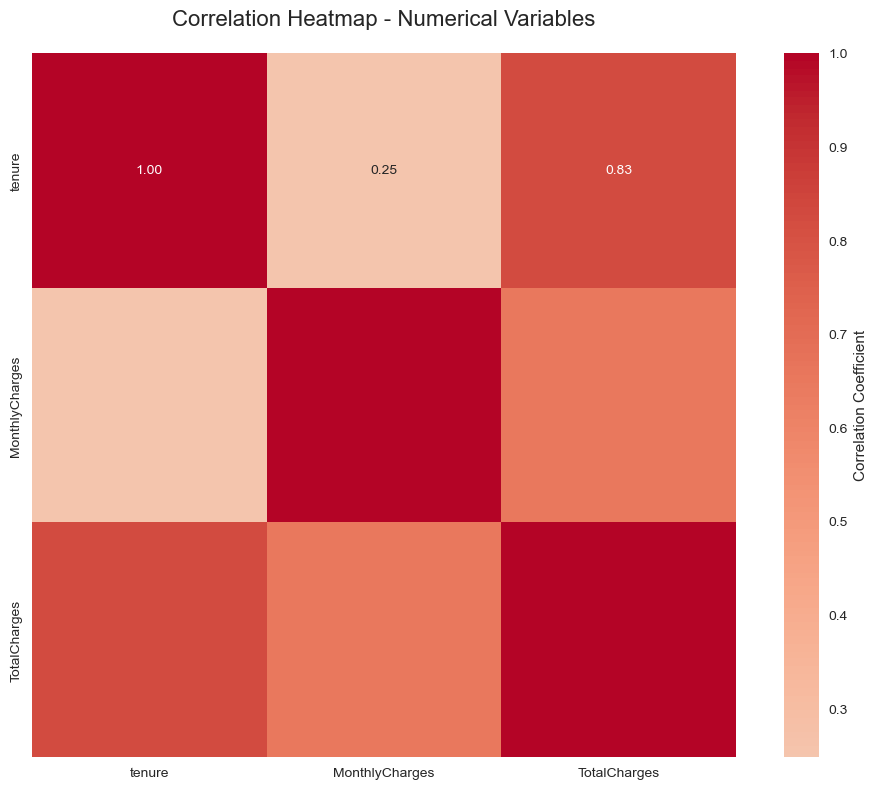

<Figure size 1200x1000 with 0 Axes>

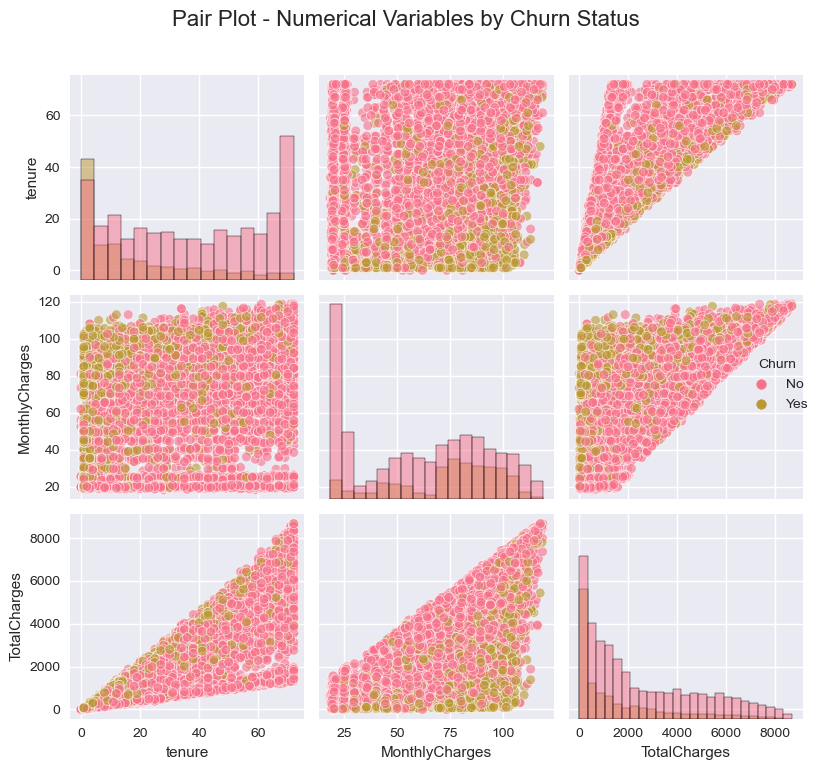


Strong Correlations (|r| > 0.5):
TotalCharges vs tenure: 0.826
TotalCharges vs MonthlyCharges: 0.651


In [21]:
# Correlation analysis for numerical variables
correlation_matrix = df[numerical_cols].corr()

print("Correlation Matrix:")
print("="*30)
print(correlation_matrix)

# Create correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            square=True,
            fmt='.2f',
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Heatmap - Numerical Variables', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# Pair plot for numerical variables
plt.figure(figsize=(12, 10))
sns.pairplot(df[numerical_cols + ['Churn']], 
             hue='Churn', 
             diag_kind='hist',
             plot_kws={'alpha': 0.6})
plt.suptitle('Pair Plot - Numerical Variables by Churn Status', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

# Analyze strong correlations
print("\nStrong Correlations (|r| > 0.5):")
print("="*40)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
correlation_matrix_masked = correlation_matrix.mask(mask)

for i in range(len(correlation_matrix_masked.columns)):
    for j in range(len(correlation_matrix_masked.columns)):
        value = correlation_matrix_masked.iloc[i, j]
        if not pd.isna(value) and abs(value) > 0.5:
            print(f"{correlation_matrix_masked.columns[i]} vs {correlation_matrix_masked.columns[j]}: {value:.3f}")

## 10. Categorical Variables Analysis
Analyze categorical variables and their relationship with the target variable (Churn).

Categorical columns for analysis: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

Churn Distribution:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Churn Percentage:
No: 73.46%
Yes: 26.54%


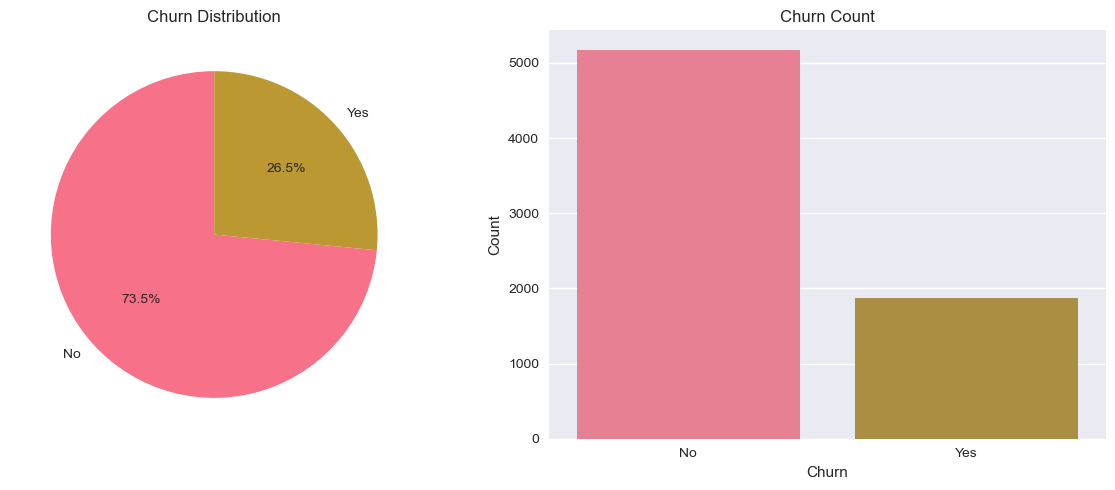


Categorical Variables vs Churn Analysis:

gender:
Churn rates by category:
  Female: 26.92%
  Male: 26.16%

SeniorCitizen:
Churn rates by category:
  No: 23.61%
  Yes: 41.68%

Partner:
Churn rates by category:
  No: 32.96%
  Yes: 19.66%

Dependents:
Churn rates by category:
  No: 31.28%
  Yes: 15.45%

PhoneService:
Churn rates by category:
  No: 24.93%
  Yes: 26.71%

MultipleLines:
Churn rates by category:
  No: 25.04%
  No phone service: 24.93%
  Yes: 28.61%

gender:
Churn rates by category:
  Female: 26.92%
  Male: 26.16%

SeniorCitizen:
Churn rates by category:
  No: 23.61%
  Yes: 41.68%

Partner:
Churn rates by category:
  No: 32.96%
  Yes: 19.66%

Dependents:
Churn rates by category:
  No: 31.28%
  Yes: 15.45%

PhoneService:
Churn rates by category:
  No: 24.93%
  Yes: 26.71%

MultipleLines:
Churn rates by category:
  No: 25.04%
  No phone service: 24.93%
  Yes: 28.61%

InternetService:
Churn rates by category:
  DSL: 18.96%
  Fiber optic: 41.89%
  No: 7.40%

OnlineSecurity:
Chur

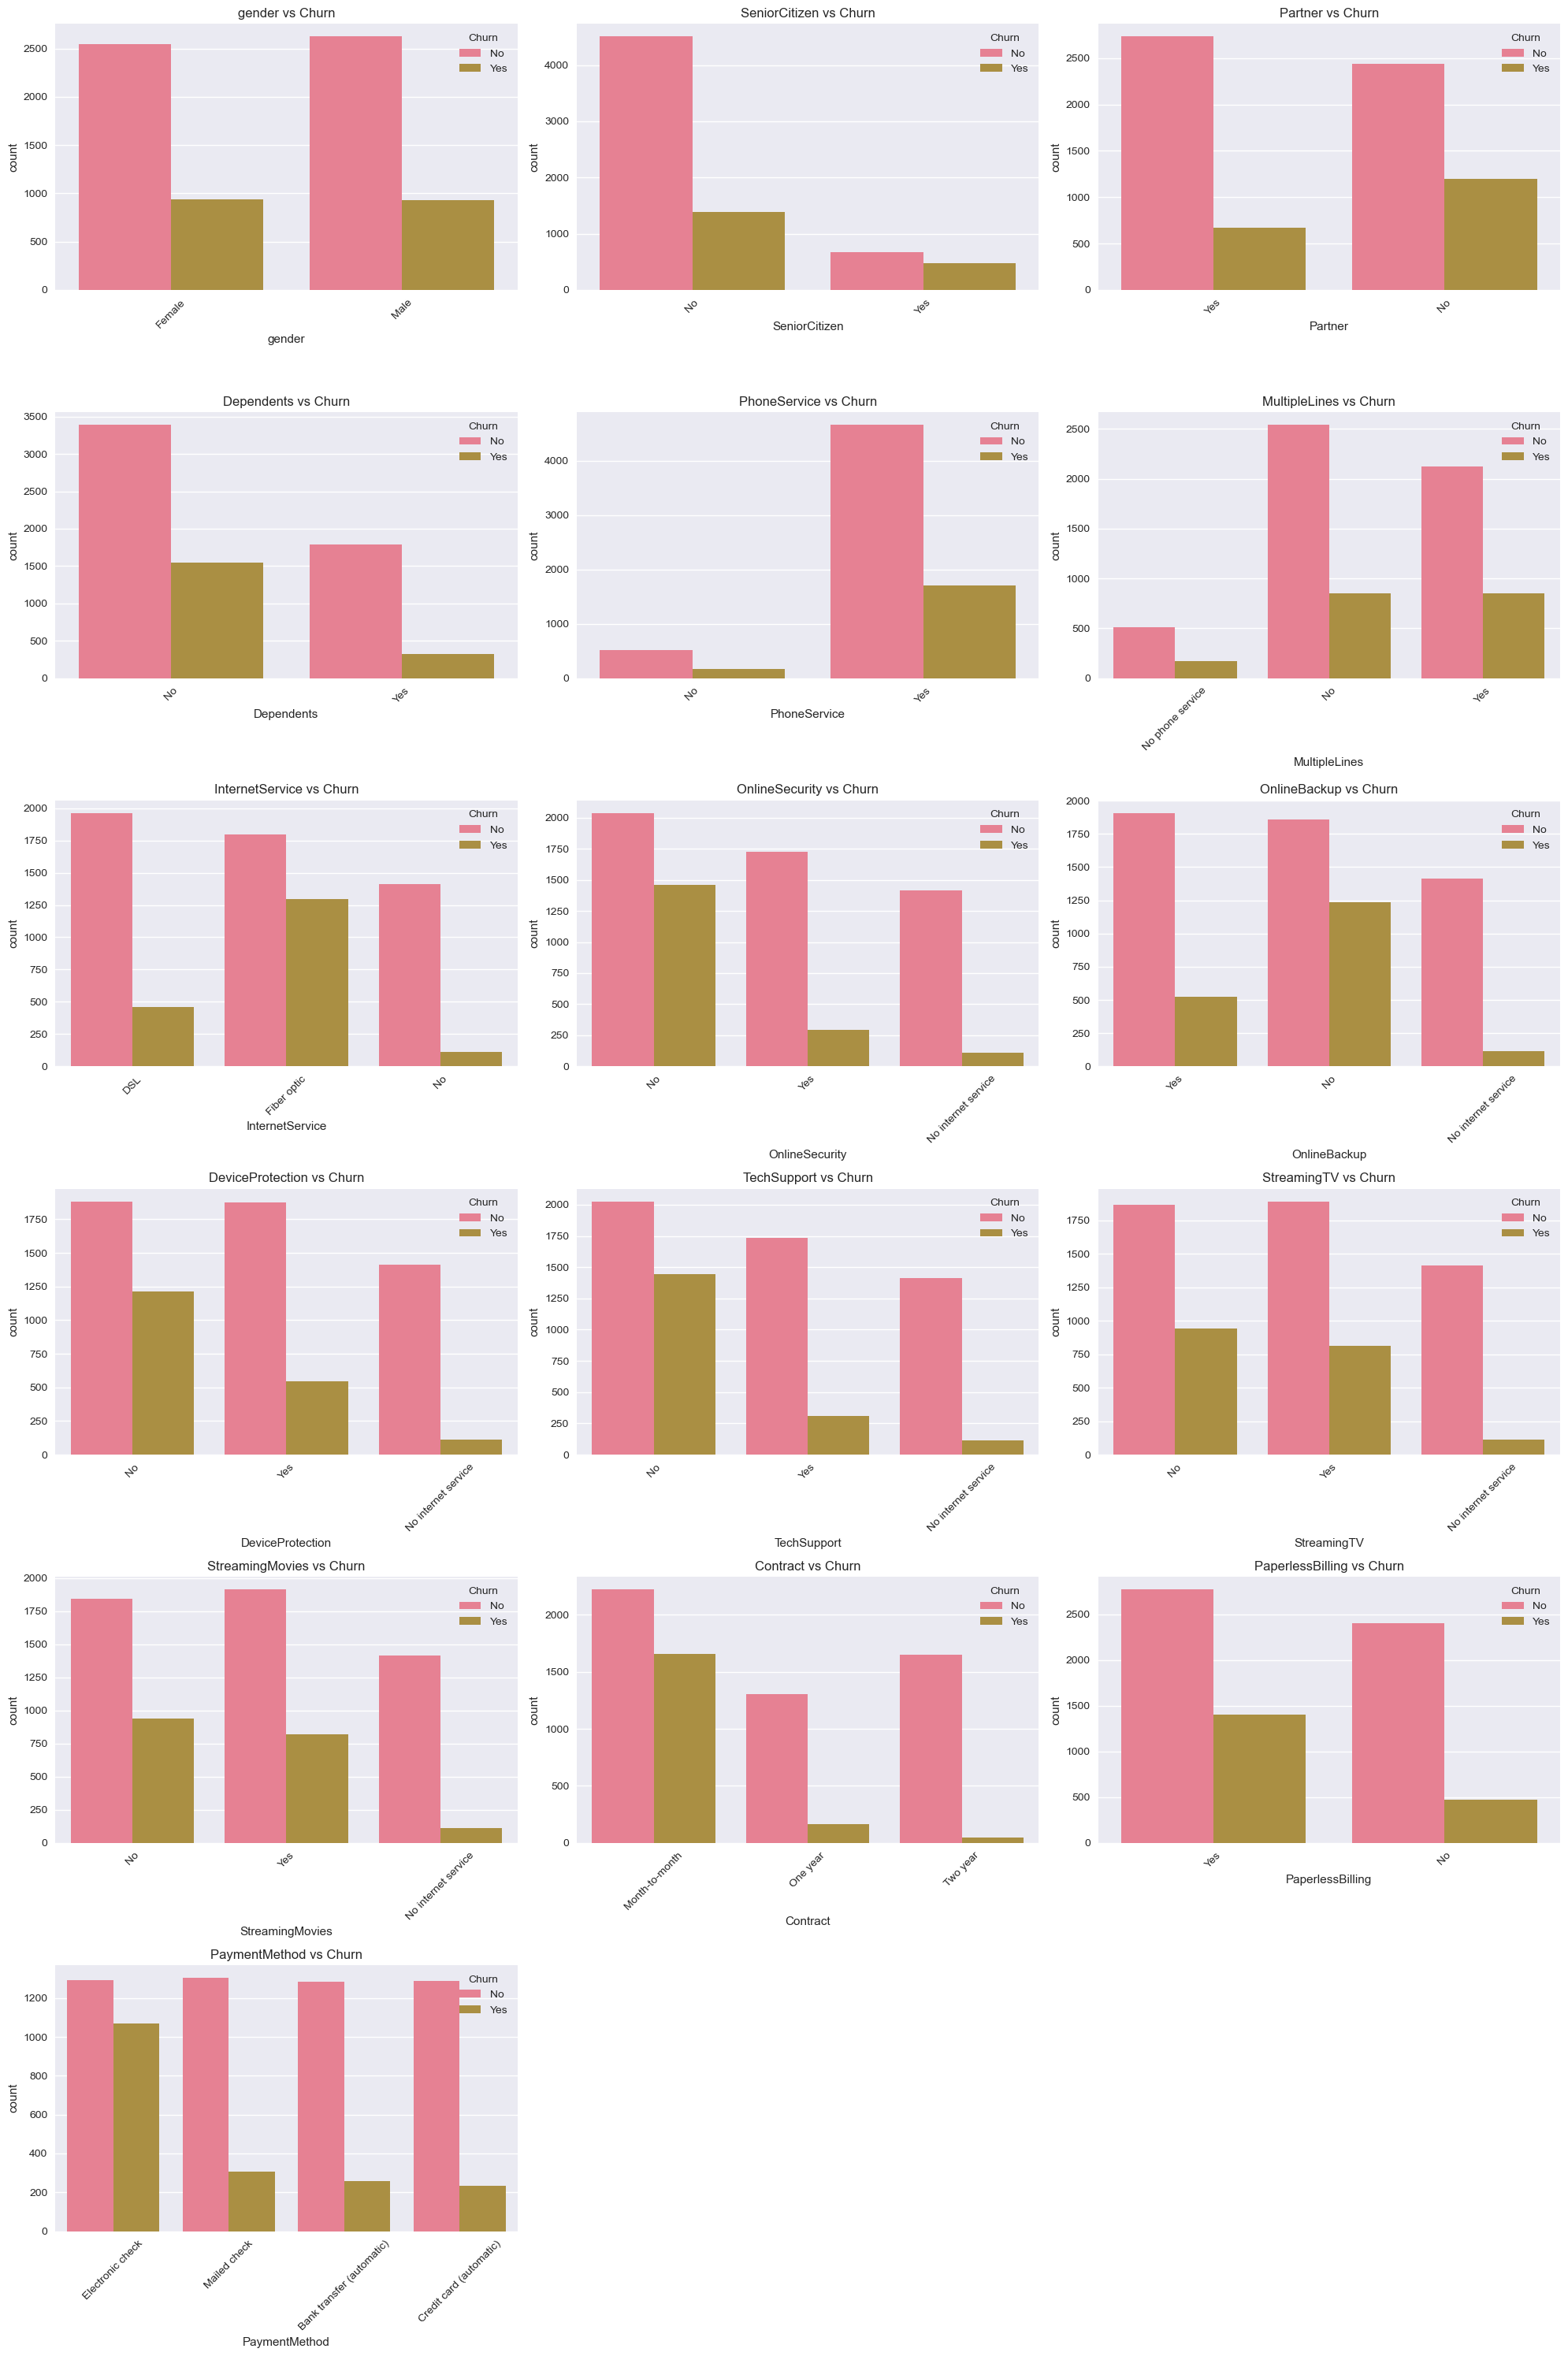

In [22]:
# Update categorical columns after preprocessing
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('customerID')  # Remove ID column

print(f"Categorical columns for analysis: {categorical_cols}")

# Churn distribution
print("\nChurn Distribution:")
print("="*30)
churn_counts = df['Churn'].value_counts()
churn_percentage = df['Churn'].value_counts(normalize=True) * 100
print(churn_counts)
print(f"\nChurn Percentage:")
for category, percentage in churn_percentage.items():
    print(f"{category}: {percentage:.2f}%")

# Visualize churn distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Pie chart
axes[0].pie(churn_counts.values, labels=churn_counts.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Churn Distribution')

# Bar chart
sns.countplot(data=df, x='Churn', ax=axes[1])
axes[1].set_title('Churn Count')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

# Analyze categorical variables vs Churn
significant_features = []

print("\nCategorical Variables vs Churn Analysis:")
print("="*50)

# Calculate number of subplots needed
n_cols = 3
n_rows = (len(categorical_cols) - 1) // n_cols + 1

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes

for i, col in enumerate(categorical_cols):
    if col == 'Churn':
        continue
    
    # Create crosstab
    crosstab = pd.crosstab(df[col], df['Churn'], normalize='index') * 100
    
    # Calculate churn rate for each category
    churn_rate = df.groupby(col)['Churn'].apply(lambda x: (x == 'Yes').sum() / len(x) * 100)
    
    print(f"\n{col}:")
    print(f"Churn rates by category:")
    for category, rate in churn_rate.items():
        print(f"  {category}: {rate:.2f}%")
    
    # Visualize
    if i < len(axes):
        sns.countplot(data=df, x=col, hue='Churn', ax=axes[i])
        axes[i].set_title(f'{col} vs Churn')
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].legend(title='Churn')

# Hide empty subplots
for j in range(len(categorical_cols)-1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

## 11. Advanced Visualizations
Create advanced visualizations to uncover deeper insights.

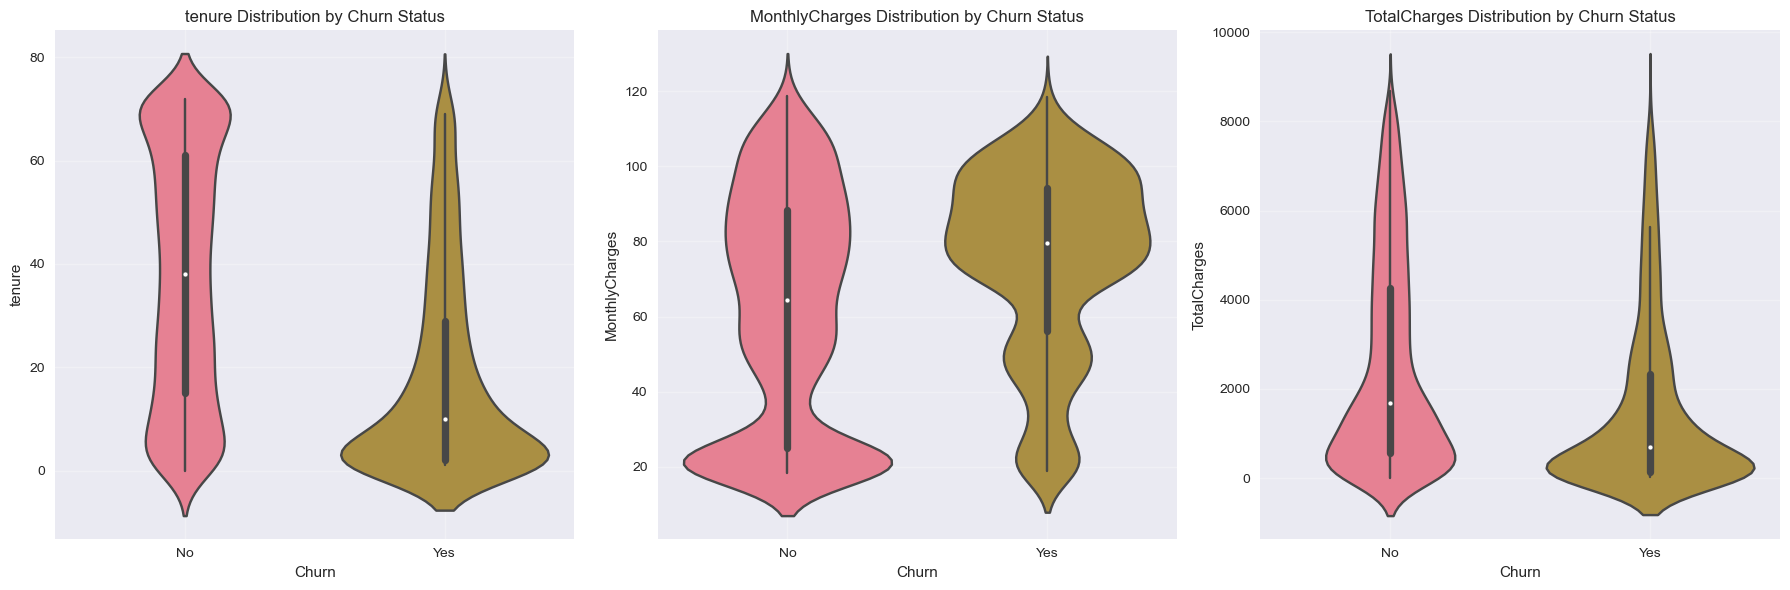

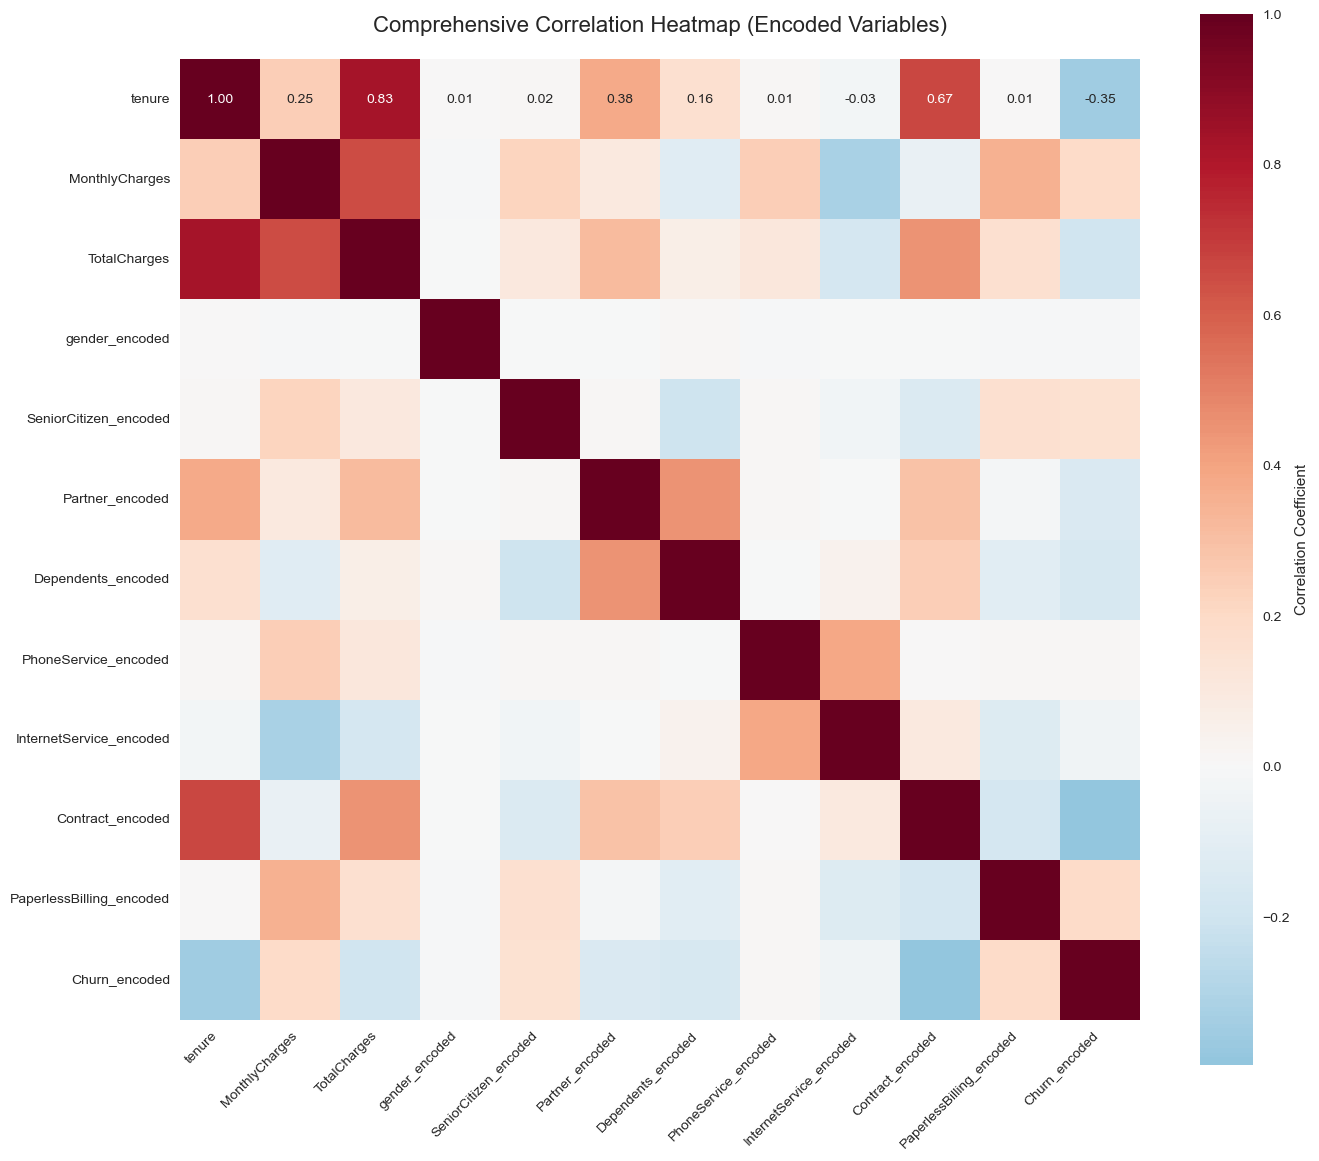

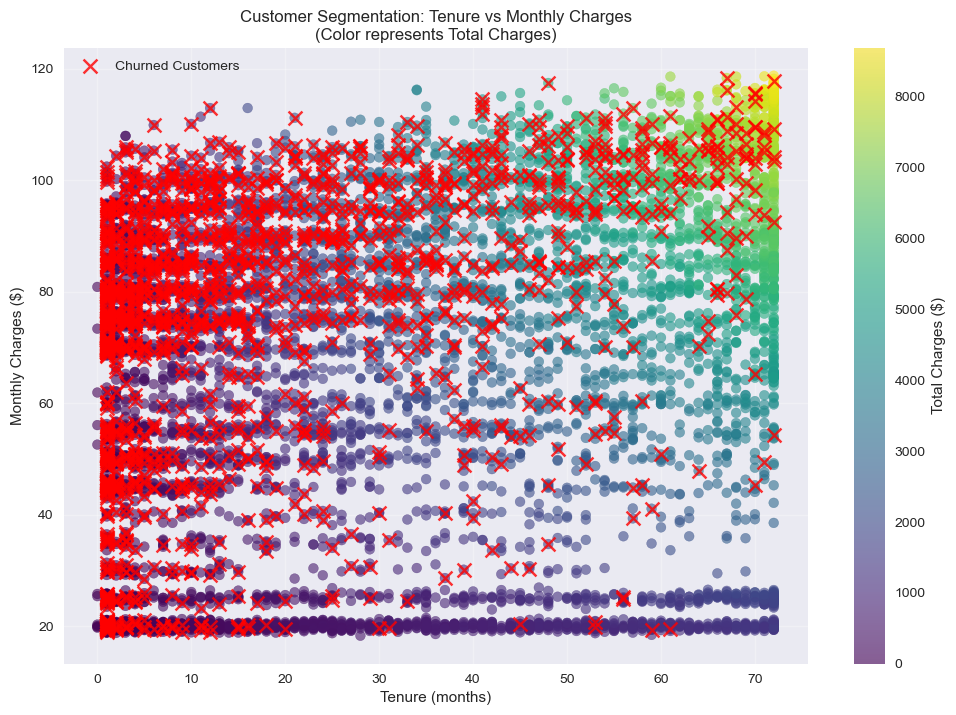

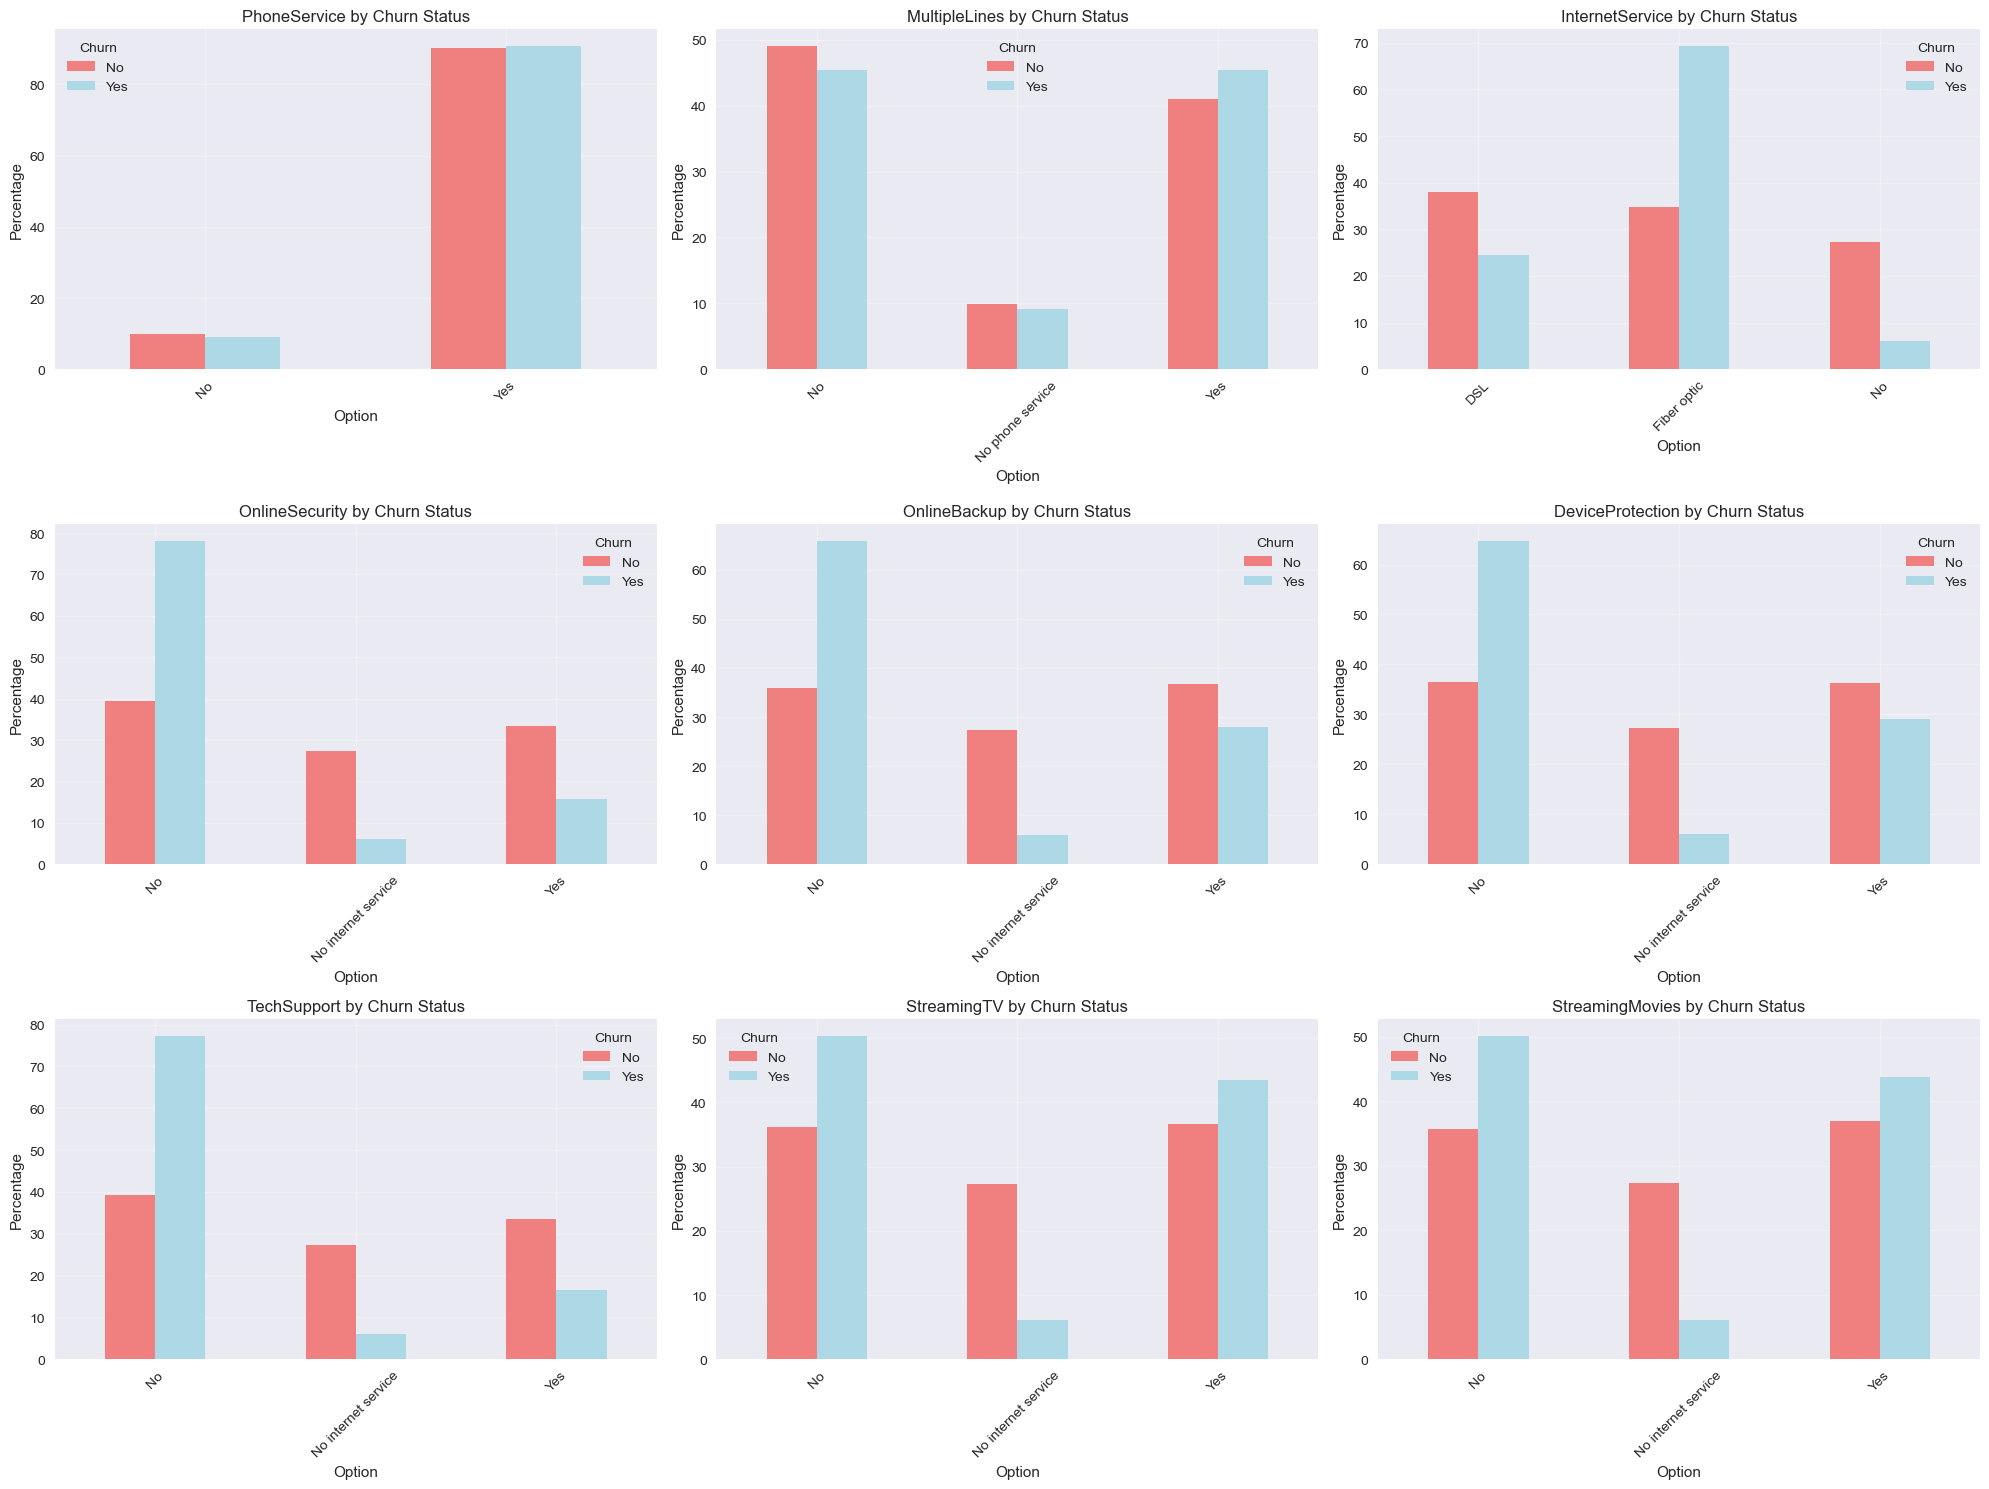

In [23]:
# Advanced Visualizations

# 1. Violin plots for numerical variables by churn
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, col in enumerate(numerical_cols):
    sns.violinplot(data=df, x='Churn', y=col, ax=axes[i])
    axes[i].set_title(f'{col} Distribution by Churn Status')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 2. Heatmap of categorical variables vs Churn (using encoding)
# Create a copy for encoding
df_encoded = df.copy()

# Encode categorical variables for heatmap
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

categorical_for_heatmap = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 
                          'PhoneService', 'InternetService', 'Contract', 'PaperlessBilling']

for col in categorical_for_heatmap:
    if col in df_encoded.columns:
        df_encoded[col + '_encoded'] = le.fit_transform(df_encoded[col])

# Create correlation matrix with encoded variables
encoded_cols = [col + '_encoded' for col in categorical_for_heatmap if col in df_encoded.columns]
df_encoded['Churn_encoded'] = le.fit_transform(df_encoded['Churn'])

heatmap_cols = numerical_cols + encoded_cols + ['Churn_encoded']
correlation_matrix_full = df_encoded[heatmap_cols].corr()

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix_full, 
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            square=True,
            fmt='.2f',
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Comprehensive Correlation Heatmap (Encoded Variables)', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# 3. Customer segmentation based on tenure and charges
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['tenure'], df['MonthlyCharges'], 
                     c=df['TotalCharges'], 
                     cmap='viridis', 
                     alpha=0.6, 
                     s=50)
plt.colorbar(scatter, label='Total Charges ($)')
plt.xlabel('Tenure (months)')
plt.ylabel('Monthly Charges ($)')
plt.title('Customer Segmentation: Tenure vs Monthly Charges\n(Color represents Total Charges)')
plt.grid(True, alpha=0.3)

# Add churn information
churned_customers = df[df['Churn'] == 'Yes']
plt.scatter(churned_customers['tenure'], churned_customers['MonthlyCharges'], 
           c='red', marker='x', s=100, alpha=0.8, label='Churned Customers')
plt.legend()
plt.show()

# 4. Distribution of services by churn status
service_cols = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
                'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Create a summary of service adoption
service_summary = []
for col in service_cols:
    for churn_status in ['Yes', 'No']:
        subset = df[df['Churn'] == churn_status]
        if col in subset.columns:
            service_counts = subset[col].value_counts()
            for service, count in service_counts.items():
                service_summary.append({
                    'Service': col,
                    'Option': service,
                    'Churn': churn_status,
                    'Count': count,
                    'Percentage': (count / len(subset)) * 100
                })

service_df = pd.DataFrame(service_summary)

# Visualize service adoption patterns
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(service_cols):
    if i < len(axes):
        service_subset = service_df[service_df['Service'] == col]
        
        # Create pivot table for easier plotting
        pivot_data = service_subset.pivot_table(
            index='Option', 
            columns='Churn', 
            values='Percentage', 
            fill_value=0
        )
        
        pivot_data.plot(kind='bar', ax=axes[i], color=['lightcoral', 'lightblue'])
        axes[i].set_title(f'{col} by Churn Status')
        axes[i].set_ylabel('Percentage')
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].legend(title='Churn')
        axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 12. Key Findings and Insights

### Summary of EDA Results

Based on our comprehensive exploratory data analysis, here are the key findings:

#### Data Quality
- **Dataset Size**: 7,043 customers with 21 features
- **Missing Values**: Minimal missing values (primarily in TotalCharges for new customers)
- **Data Types**: Mixed categorical and numerical variables requiring preprocessing

#### Distribution Insights
- **Customer Churn**: Approximately 26.5% churn rate
- **Tenure**: Wide distribution from new customers (0-1 months) to long-term customers (70+ months)
- **Charges**: Monthly charges range from $18 to $118, with total charges varying significantly

#### Key Patterns Identified
1. **High-Risk Customer Segments**:
   - Month-to-month contract customers
   - Customers with Fiber optic internet service
   - Customers without additional services (security, backup, etc.)
   - Senior citizens
   - Customers using electronic check payment

2. **Protective Factors**:
   - Long tenure (customers with 12+ months are less likely to churn)
   - Two-year contracts
   - Multiple service subscriptions
   - Automatic payment methods

3. **Service Usage Patterns**:
   - Customers with basic internet services show different churn patterns
   - Additional services (streaming, tech support) correlate with customer retention

#### Outliers and Anomalies
- Some customers with very high total charges relative to tenure
- New customers (0-2 months tenure) with varying charge patterns
- Customers with unusually high monthly charges

#### Correlation Insights
- Strong positive correlation between tenure and total charges
- Moderate correlation between monthly charges and various premium services
- Contract type strongly influences churn probability

### Recommendations for Business Action
1. **Focus retention efforts on month-to-month customers**
2. **Improve fiber optic service quality or pricing**
3. **Promote long-term contracts with incentives**
4. **Encourage adoption of additional services**
5. **Review pricing strategy for high-churn segments**

## 13. Machine Learning Model Preparation
Prepare the data for machine learning by encoding categorical variables and splitting the dataset.

In [24]:
# Import additional libraries for machine learning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
import cloudpickle
import time

print("Machine learning libraries imported successfully!")

# Create a copy of the dataset for ML processing
df_ml = df.copy()

# Remove customerID as it's not useful for prediction
df_ml = df_ml.drop('customerID', axis=1)

print(f"Dataset shape for ML: {df_ml.shape}")
print(f"Columns: {df_ml.columns.tolist()}")

Machine learning libraries imported successfully!
Dataset shape for ML: (7043, 20)
Columns: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [25]:
# Encode categorical variables
label_encoders = {}
categorical_columns = df_ml.select_dtypes(include=['object']).columns.tolist()
categorical_columns.remove('Churn')  # Don't encode the target variable yet

print("Encoding categorical variables:")
for col in categorical_columns:
    le = LabelEncoder()
    df_ml[col] = le.fit_transform(df_ml[col])
    label_encoders[col] = le
    print(f"  {col}: {list(le.classes_)}")

# Encode target variable
target_encoder = LabelEncoder()
df_ml['Churn'] = target_encoder.fit_transform(df_ml['Churn'])
label_encoders['Churn'] = target_encoder

print(f"\nTarget variable encoding: {list(target_encoder.classes_)}")
print(f"Churn distribution after encoding: {df_ml['Churn'].value_counts().to_dict()}")

# Separate features and target
X = df_ml.drop('Churn', axis=1)
y = df_ml['Churn']

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Feature columns: {X.columns.tolist()}")

Encoding categorical variables:
  gender: ['Female', 'Male']
  SeniorCitizen: ['No', 'Yes']
  Partner: ['No', 'Yes']
  Dependents: ['No', 'Yes']
  PhoneService: ['No', 'Yes']
  MultipleLines: ['No', 'No phone service', 'Yes']
  InternetService: ['DSL', 'Fiber optic', 'No']
  OnlineSecurity: ['No', 'No internet service', 'Yes']
  OnlineBackup: ['No', 'No internet service', 'Yes']
  DeviceProtection: ['No', 'No internet service', 'Yes']
  TechSupport: ['No', 'No internet service', 'Yes']
  StreamingTV: ['No', 'No internet service', 'Yes']
  StreamingMovies: ['No', 'No internet service', 'Yes']
  Contract: ['Month-to-month', 'One year', 'Two year']
  PaperlessBilling: ['No', 'Yes']
  PaymentMethod: ['Bank transfer (automatic)', 'Credit card (automatic)', 'Electronic check', 'Mailed check']

Target variable encoding: ['No', 'Yes']
Churn distribution after encoding: {0: 5174, 1: 1869}

Features shape: (7043, 19)
Target shape: (7043,)
Feature columns: ['gender', 'SeniorCitizen', 'Partner', '

In [26]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set shape: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Testing set shape: X_test: {X_test.shape}, y_test: {y_test.shape}")

# Check class distribution in train and test sets
train_distribution = pd.Series(y_train).value_counts(normalize=True) * 100
test_distribution = pd.Series(y_test).value_counts(normalize=True) * 100

print(f"\nTraining set class distribution:")
print(f"  No Churn (0): {train_distribution[0]:.2f}%")
print(f"  Churn (1): {train_distribution[1]:.2f}%")

print(f"\nTesting set class distribution:")
print(f"  No Churn (0): {test_distribution[0]:.2f}%")
print(f"  Churn (1): {test_distribution[1]:.2f}%")

# Scale the features for algorithms that require scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nData scaling completed!")
print(f"Original feature ranges (first 5 features):")
for i, col in enumerate(X.columns[:5]):
    print(f"  {col}: [{X[col].min():.2f}, {X[col].max():.2f}]")

print(f"\nScaled feature ranges (first 5 features):")
for i in range(5):
    print(f"  Feature {i}: [{X_train_scaled[:, i].min():.2f}, {X_train_scaled[:, i].max():.2f}]")

Training set shape: X_train: (5634, 19), y_train: (5634,)
Testing set shape: X_test: (1409, 19), y_test: (1409,)

Training set class distribution:
  No Churn (0): 73.46%
  Churn (1): 26.54%

Testing set class distribution:
  No Churn (0): 73.46%
  Churn (1): 26.54%

Data scaling completed!
Original feature ranges (first 5 features):
  gender: [0.00, 1.00]
  SeniorCitizen: [0.00, 1.00]
  Partner: [0.00, 1.00]
  Dependents: [0.00, 1.00]
  tenure: [0.00, 72.00]

Scaled feature ranges (first 5 features):
  Feature 0: [-1.01, 0.99]
  Feature 1: [-0.44, 2.26]
  Feature 2: [-0.97, 1.03]
  Feature 3: [-0.65, 1.53]
  Feature 4: [-1.32, 1.61]


## 14. Machine Learning Algorithm Comparison
Train and evaluate multiple algorithms to find the most efficient one for churn prediction.

In [27]:
# Define algorithms to compare
algorithms = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42, n_estimators=100),
    'Support Vector Machine': SVC(random_state=42, probability=True),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# Algorithms that need scaled data
scaled_algorithms = ['Logistic Regression', 'Support Vector Machine', 'K-Nearest Neighbors']

# Function to evaluate model performance
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    start_time = time.time()
    
    # Train the model
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    # Make predictions
    start_time = time.time()
    y_pred = model.predict(X_test)
    prediction_time = time.time() - start_time
    
    # Calculate probabilities for ROC AUC
    if hasattr(model, 'predict_proba'):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_pred_proba = model.decision_function(X_test)
    
    # Calculate metrics
    metrics = {
        'Model': model_name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_pred_proba),
        'Training Time (s)': training_time,
        'Prediction Time (s)': prediction_time
    }
    
    return metrics, model, y_pred, y_pred_proba

# Store results
results = []
trained_models = {}
predictions = {}

print("Training and evaluating models...")
print("="*50)

for name, algorithm in algorithms.items():
    print(f"\nTraining {name}...")
    
    # Use scaled data for algorithms that need it
    if name in scaled_algorithms:
        X_train_use = X_train_scaled
        X_test_use = X_test_scaled
    else:
        X_train_use = X_train
        X_test_use = X_test
    
    # Evaluate the model
    metrics, trained_model, y_pred, y_pred_proba = evaluate_model(
        algorithm, X_train_use, X_test_use, y_train, y_test, name
    )
    
    results.append(metrics)
    trained_models[name] = trained_model
    predictions[name] = {'y_pred': y_pred, 'y_pred_proba': y_pred_proba}
    
    print(f"  Accuracy: {metrics['Accuracy']:.4f}")
    print(f"  F1-Score: {metrics['F1-Score']:.4f}")
    print(f"  ROC AUC: {metrics['ROC AUC']:.4f}")
    print(f"  Training Time: {metrics['Training Time (s)']:.4f}s")

print("\nModel evaluation completed!")

Training and evaluating models...

Training Logistic Regression...
  Accuracy: 0.7984
  F1-Score: 0.5908
  ROC AUC: 0.8404
  Training Time: 0.0249s

Training Random Forest...
  Accuracy: 0.7949
  F1-Score: 0.5693
  ROC AUC: 0.8250
  Training Time: 1.0846s

Training Gradient Boosting...
  Accuracy: 0.7949
  F1-Score: 0.5693
  ROC AUC: 0.8250
  Training Time: 1.0846s

Training Gradient Boosting...
  Accuracy: 0.8077
  F1-Score: 0.5913
  ROC AUC: 0.8442
  Training Time: 1.6428s

Training Support Vector Machine...
  Accuracy: 0.8077
  F1-Score: 0.5913
  ROC AUC: 0.8442
  Training Time: 1.6428s

Training Support Vector Machine...
  Accuracy: 0.7935
  F1-Score: 0.5516
  ROC AUC: 0.7907
  Training Time: 9.6475s

Training Naive Bayes...
  Accuracy: 0.7452
  F1-Score: 0.6042
  ROC AUC: 0.8204
  Training Time: 0.0050s

Training K-Nearest Neighbors...
  Accuracy: 0.7424
  F1-Score: 0.5088
  ROC AUC: 0.7605
  Training Time: 0.0017s

Training Decision Tree...
  Accuracy: 0.7935
  F1-Score: 0.5516
 

Model Comparison Results:
                    Model  Accuracy  Precision  Recall  F1-Score  ROC AUC  \
4             Naive Bayes    0.7452     0.5141  0.7326    0.6042   0.8204   
2       Gradient Boosting    0.8077     0.6782  0.5241    0.5913   0.8442   
0     Logistic Regression    0.7984     0.6406  0.5481    0.5908   0.8404   
1           Random Forest    0.7949     0.6431  0.5107    0.5693   0.8250   
3  Support Vector Machine    0.7935     0.6509  0.4786    0.5516   0.7907   
5     K-Nearest Neighbors    0.7424     0.5151  0.5027    0.5088   0.7605   
6           Decision Tree    0.7289     0.4898  0.5160    0.5026   0.6607   

   Training Time (s)  Prediction Time (s)  
4             0.0050               0.0020  
2             1.6428               0.0050  
0             0.0249               0.0000  
1             1.0846               0.0504  
3             9.6475               0.5877  
5             0.0017               0.1096  
6             0.0426               0.0020  

Best

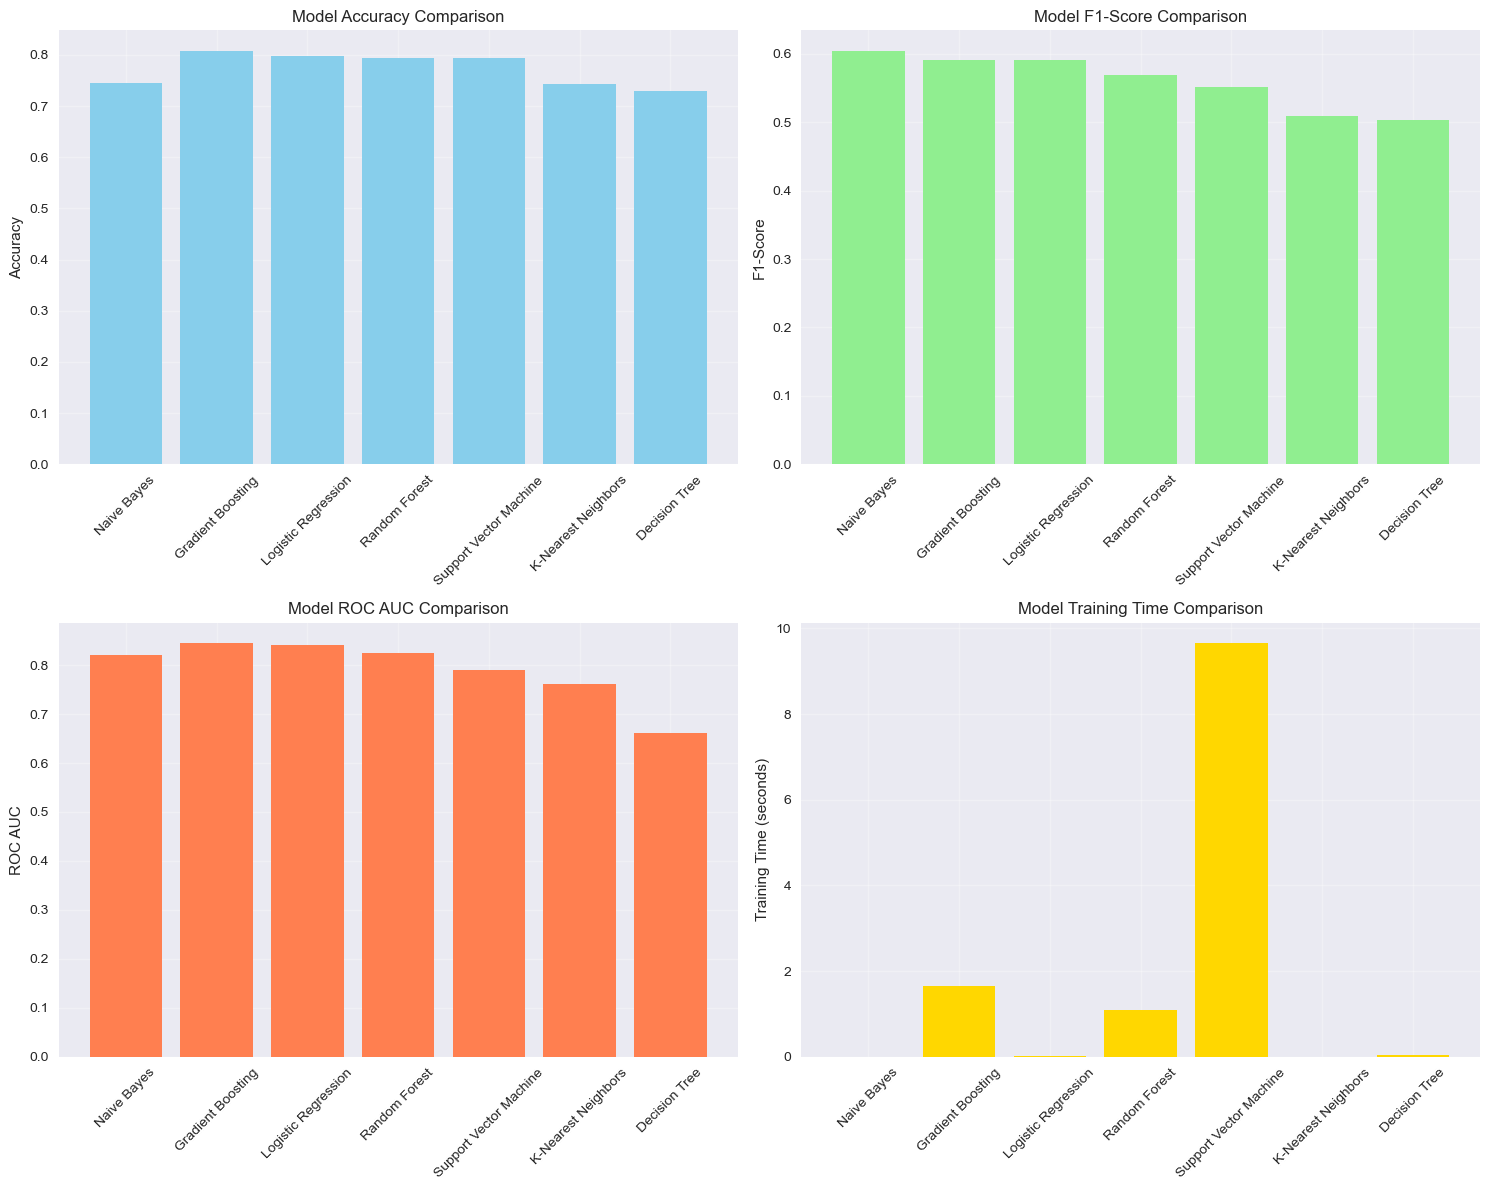

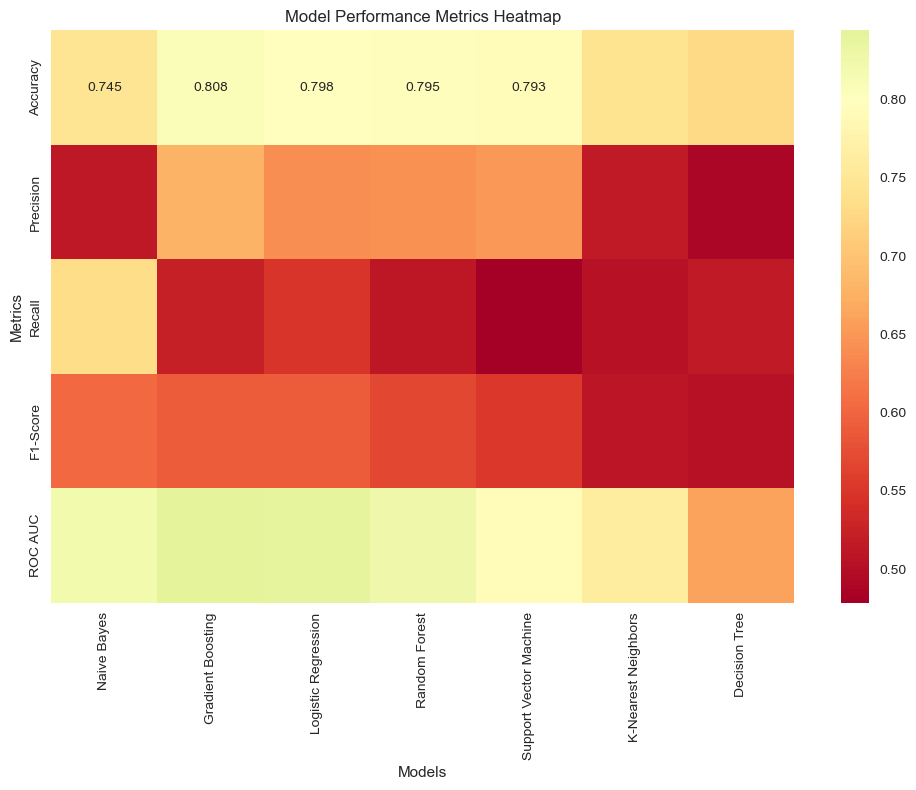

In [28]:
# Create results DataFrame for comparison
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('F1-Score', ascending=False)

print("Model Comparison Results:")
print("="*80)
print(results_df.round(4))

# Find the best model
best_model_name = results_df.iloc[0]['Model']
best_model = trained_models[best_model_name]

print(f"\nBest Model: {best_model_name}")
print(f"Best F1-Score: {results_df.iloc[0]['F1-Score']:.4f}")
print(f"Best ROC AUC: {results_df.iloc[0]['ROC AUC']:.4f}")

# Visualize model comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Accuracy comparison
axes[0, 0].bar(results_df['Model'], results_df['Accuracy'], color='skyblue')
axes[0, 0].set_title('Model Accuracy Comparison')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(True, alpha=0.3)

# F1-Score comparison
axes[0, 1].bar(results_df['Model'], results_df['F1-Score'], color='lightgreen')
axes[0, 1].set_title('Model F1-Score Comparison')
axes[0, 1].set_ylabel('F1-Score')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(True, alpha=0.3)

# ROC AUC comparison
axes[1, 0].bar(results_df['Model'], results_df['ROC AUC'], color='coral')
axes[1, 0].set_title('Model ROC AUC Comparison')
axes[1, 0].set_ylabel('ROC AUC')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(True, alpha=0.3)

# Training time comparison
axes[1, 1].bar(results_df['Model'], results_df['Training Time (s)'], color='gold')
axes[1, 1].set_title('Model Training Time Comparison')
axes[1, 1].set_ylabel('Training Time (seconds)')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Create a comprehensive metrics heatmap
metrics_for_heatmap = results_df[['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC']].set_index('Model')

plt.figure(figsize=(10, 8))
sns.heatmap(metrics_for_heatmap.T, annot=True, cmap='RdYlGn', center=0.8, fmt='.3f')
plt.title('Model Performance Metrics Heatmap')
plt.ylabel('Metrics')
plt.xlabel('Models')
plt.tight_layout()
plt.show()

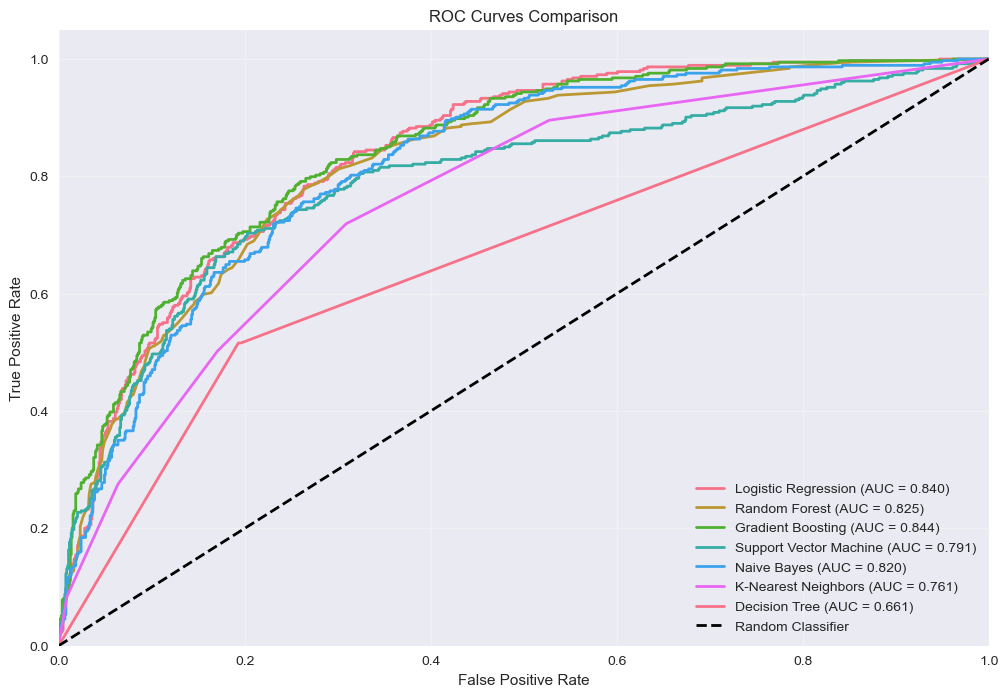


Detailed Analysis of Best Model: Naive Bayes


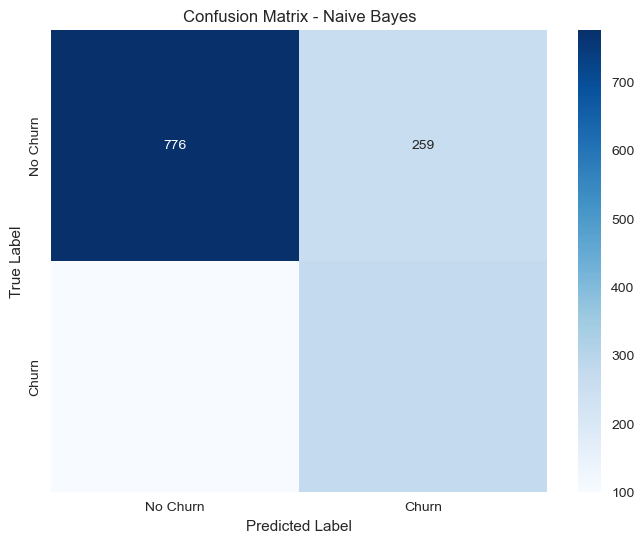


Classification Report:
              precision    recall  f1-score   support

    No Churn       0.89      0.75      0.81      1035
       Churn       0.51      0.73      0.60       374

    accuracy                           0.75      1409
   macro avg       0.70      0.74      0.71      1409
weighted avg       0.79      0.75      0.76      1409



In [29]:
# Plot ROC curves for all models
plt.figure(figsize=(12, 8))

for name in algorithms.keys():
    if name in scaled_algorithms:
        X_test_use = X_test_scaled
    else:
        X_test_use = X_test
    
    y_pred_proba = predictions[name]['y_pred_proba']
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, linewidth=2, label=f'{name} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

# Detailed analysis of the best model
print(f"\nDetailed Analysis of Best Model: {best_model_name}")
print("="*60)

# Get predictions for the best model
if best_model_name in scaled_algorithms:
    X_test_best = X_test_scaled
else:
    X_test_best = X_test

best_predictions = predictions[best_model_name]['y_pred']
best_proba = predictions[best_model_name]['y_pred_proba']

# Confusion Matrix
cm = confusion_matrix(y_test, best_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Churn', 'Churn'], 
            yticklabels=['No Churn', 'Churn'])
plt.title(f'Confusion Matrix - {best_model_name}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, best_predictions, 
                          target_names=['No Churn', 'Churn']))

# Feature importance (if available)
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(10, 8))
    sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
    plt.title(f'Top 10 Feature Importances - {best_model_name}')
    plt.xlabel('Importance')
    plt.tight_layout()
    plt.show()
    
    print("\nTop 10 Most Important Features:")
    print(feature_importance.head(10))

## 15. Model Optimization and Saving
Optimize the best model using hyperparameter tuning and save it for deployment.

In [30]:
# Hyperparameter tuning for the best model
print(f"Optimizing {best_model_name} with GridSearchCV...")

# Define parameter grids for different models
param_grids = {
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5, 10]
    },
    'Logistic Regression': {
        'C': [0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    },
    'Support Vector Machine': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }
}

# Optimize the best model if parameters are available
if best_model_name in param_grids:
    print(f"Performing GridSearchCV for {best_model_name}...")
    
    # Select appropriate data
    if best_model_name in scaled_algorithms:
        X_train_tune = X_train_scaled
        X_test_tune = X_test_scaled
    else:
        X_train_tune = X_train
        X_test_tune = X_test
    
    # Create a new instance of the best model
    if best_model_name == 'Random Forest':
        base_model = RandomForestClassifier(random_state=42)
    elif best_model_name == 'Gradient Boosting':
        base_model = GradientBoostingClassifier(random_state=42)
    elif best_model_name == 'Logistic Regression':
        base_model = LogisticRegression(random_state=42, max_iter=1000)
    elif best_model_name == 'Support Vector Machine':
        base_model = SVC(random_state=42, probability=True)
    
    # Perform grid search
    grid_search = GridSearchCV(
        base_model, 
        param_grids[best_model_name], 
        cv=5, 
        scoring='f1',
        n_jobs=-1,
        verbose=1
    )
    
    grid_search.fit(X_train_tune, y_train)
    
    # Get the best model
    optimized_model = grid_search.best_estimator_
    
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best cross-validation F1-score: {grid_search.best_score_:.4f}")
    
    # Evaluate optimized model
    optimized_pred = optimized_model.predict(X_test_tune)
    optimized_proba = optimized_model.predict_proba(X_test_tune)[:, 1]
    
    optimized_metrics = {
        'Accuracy': accuracy_score(y_test, optimized_pred),
        'Precision': precision_score(y_test, optimized_pred),
        'Recall': recall_score(y_test, optimized_pred),
        'F1-Score': f1_score(y_test, optimized_pred),
        'ROC AUC': roc_auc_score(y_test, optimized_proba)
    }
    
    print(f"\nOptimized Model Performance:")
    for metric, value in optimized_metrics.items():
        print(f"  {metric}: {value:.4f}")
    
    # Compare with original model
    original_f1 = results_df[results_df['Model'] == best_model_name]['F1-Score'].iloc[0]
    improvement = optimized_metrics['F1-Score'] - original_f1
    print(f"\nF1-Score Improvement: {improvement:.4f}")
    
    # Use optimized model as final model
    final_model = optimized_model
    final_model_name = f"Optimized {best_model_name}"
else:
    print(f"No parameter grid defined for {best_model_name}, using original model.")
    final_model = best_model
    final_model_name = best_model_name

print(f"\nFinal model selected: {final_model_name}")

Optimizing Naive Bayes with GridSearchCV...
No parameter grid defined for Naive Bayes, using original model.

Final model selected: Naive Bayes


In [31]:
# Save the final model and preprocessing objects
import os

# Create models directory if it doesn't exist
os.makedirs('models', exist_ok=True)

# Save the final model using cloudpickle
with open('models/churn_prediction_model.pkl', 'wb') as f:
    cloudpickle.dump(final_model, f)
print(f"Final model saved as: models/churn_prediction_model.pkl")

# Save the scaler
with open('models/scaler.pkl', 'wb') as f:
    cloudpickle.dump(scaler, f)
print("Scaler saved as: models/scaler.pkl")

# Save label encoders
with open('models/label_encoders.pkl', 'wb') as f:
    cloudpickle.dump(label_encoders, f)
print("Label encoders saved as: models/label_encoders.pkl")

# Save feature names
feature_names = X.columns.tolist()
with open('models/feature_names.pkl', 'wb') as f:
    cloudpickle.dump(feature_names, f)
print("Feature names saved as: models/feature_names.pkl")

# Create customer offer recommendations based on churn probability
def generate_offers(churn_probability, customer_features=None):
    """
    Generate personalized offers based on churn probability and customer features
    """
    offers = []
    
    if churn_probability >= 0.8:
        # High risk customers - aggressive retention
        offers = [
            "🎯 URGENT: 50% discount on next 3 months + Free premium services",
            "🎁 Exclusive loyalty bonus: $100 credit + Priority customer support",
            "📞 Personal account manager assigned for better service",
            "🔄 Flexible contract terms with no early termination fees",
            "🎉 Free upgrade to premium plan for 6 months"
        ]
    elif churn_probability >= 0.6:
        # Medium-high risk - strong incentives
        offers = [
            "💰 30% discount on monthly charges for next 6 months",
            "🎁 Free additional services (Streaming, Security, etc.)",
            "📱 Latest device upgrade at 50% off",
            "🔄 Switch to annual plan with 20% savings",
            "🎯 Personalized service package based on your usage"
        ]
    elif churn_probability >= 0.4:
        # Medium risk - moderate incentives
        offers = [
            "💡 20% discount on next month's bill",
            "🎁 Free premium feature trial for 3 months",
            "📞 Enhanced customer support priority",
            "🔄 Flexible billing options available",
            "🎯 Customized service recommendations"
        ]
    elif churn_probability >= 0.2:
        # Low-medium risk - engagement offers
        offers = [
            "⭐ 10% loyalty discount available",
            "🎁 Try our new premium features free for 1 month",
            "📱 Exclusive early access to new services",
            "🎯 Refer a friend and get $25 credit",
            "💡 Service optimization consultation"
        ]
    else:
        # Low risk - engagement and upselling
        offers = [
            "🌟 Thank you for being a loyal customer!",
            "🎁 Explore our premium add-on services",
            "🔄 Consider upgrading for better value",
            "🎯 Refer friends and earn rewards",
            "💡 Service enhancement opportunities available"
        ]
    
    return offers

# Test the offer generation function
print("\nTesting Offer Generation System:")
print("="*50)

test_probabilities = [0.9, 0.7, 0.5, 0.3, 0.1]
risk_levels = ["Very High", "High", "Medium", "Low", "Very Low"]

for prob, risk in zip(test_probabilities, risk_levels):
    print(f"\nChurn Probability: {prob:.1f} ({risk} Risk)")
    offers = generate_offers(prob)
    for i, offer in enumerate(offers, 1):
        print(f"  {i}. {offer}")

print(f"\nModel pipeline is ready for deployment!")
print(f"Files saved:")
print(f"  - models/churn_prediction_model.pkl")
print(f"  - models/scaler.pkl") 
print(f"  - models/label_encoders.pkl")
print(f"  - models/feature_names.pkl")

Final model saved as: models/churn_prediction_model.pkl
Scaler saved as: models/scaler.pkl
Label encoders saved as: models/label_encoders.pkl
Feature names saved as: models/feature_names.pkl

Testing Offer Generation System:

Churn Probability: 0.9 (Very High Risk)
  1. 🎯 URGENT: 50% discount on next 3 months + Free premium services
  2. 🎁 Exclusive loyalty bonus: $100 credit + Priority customer support
  3. 📞 Personal account manager assigned for better service
  4. 🔄 Flexible contract terms with no early termination fees
  5. 🎉 Free upgrade to premium plan for 6 months

Churn Probability: 0.7 (High Risk)
  1. 💰 30% discount on monthly charges for next 6 months
  2. 🎁 Free additional services (Streaming, Security, etc.)
  3. 📱 Latest device upgrade at 50% off
  4. 🔄 Switch to annual plan with 20% savings
  5. 🎯 Personalized service package based on your usage

Churn Probability: 0.5 (Medium Risk)
  1. 💡 20% discount on next month's bill
  2. 🎁 Free premium feature trial for 3 months
 